# Unsupervised Learning

Unsupervised learning process flow is given in figure below. Similar to supervised learning we can train a model and use it to predict the unknow data set, however the key difference is that there is no predifined category or labels available for target variable, and the goal often is to create category or label based on patterns available in data.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Unsupervised.png?raw=true "Unsupervised Learning"
## Clustering
Clustering is an unsupervised learning problem. Key objective is to identify distinct groups (called clusters) based on some notion of similarity within a given dataset. Clustering analysis origins can be traced to the area of Anthropology and Psychology in the 193’s. The most popularly used clustering techniques are k-means (divisive) and hierarchical (agglomerative).
## K-means
The key objective of a k-means algorithm is to organize data into clusters such that there is high intra-cluster similarity and low inter-cluster similarity. An item will only belong to one cluster, not several, that is, it generates a specific number of disjoint, non-hierarchical clusters. K-means uses the strategy of divide and concur, and it is a classic example for an expectation maximization (EM) algorithm. EM algorithms are made up of two steps:<br>
the first step is known as expectation(E) and is used to find the expected point associated with a cluster; and the second step is known as maximization(M) and is used to improve the estimation of the cluster using knowledge from the first step. The two steps are processed repeatedly until convergence is reached.
<br>
Suppose we have ‘n’ data points that we need to cluster into k (c1, c2, c3) groups.


![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Unsupervised2.JPG?raw=true "K-means"
- **Step 1:** In the first step k centroids (in above case k=3) is randomly picked (only in the first iteration) and all the points that are nearest to each centroid point are assigned to that specific cluster. Centroid is the arithmetic mean or average position of all the points.
- **Step 2:** Here the centroid point is recalculated using the average of the coordinates of all the points in that cluster. Then step one is repeated (assign nearest point) until the clusters converge.


![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Unsupervised3.JPG?raw=true "Unsupervised"

# Limitations of K-means
- K-means clustering needs the number of clusters to be specified.
- K-means has problems when clusters are of differing sized, densities, and non-globular shapes.
- Presence of outlier can skew the results.


Let's load the iris data and assume for a moment that the species column is missing,
that is, we have the measured values for sepal length/width and petal length/width but
we do not know how many species exists. <br>
Now let's use unsupervised learning, that is, clustering to find out how many species
exists. The goal here is to group all similar items into a cluster. We can assume a k of 3 for
now; we’ll learn later about an approach to find the value of k.

### k-means clustering

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.head()

X = iris.ix[:,:3]  # independent variables
y = iris.species   # dependent variable


sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [4]:
# K Means Cluster
model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
print (model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
# since its unsupervised the labels have been assigned
# not in line with the actual lables so let's convert all the 1s to 0s and 0s to 1s
# 2's look fine
iris['pred_species'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print ("Classification report :", metrics.classification_report(iris.species, iris.pred_species))

Accuracy : 0.806666666667
Classification report :              precision    recall  f1-score   support

        0.0       1.00      0.98      0.99        50
        1.0       0.71      0.70      0.71        50
        2.0       0.71      0.74      0.73        50

avg / total       0.81      0.81      0.81       150



In [ ]:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap
colormap = np.array(['red', 'blue', 'green'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.pred_species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 2)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.pred_species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

## Finding value of K

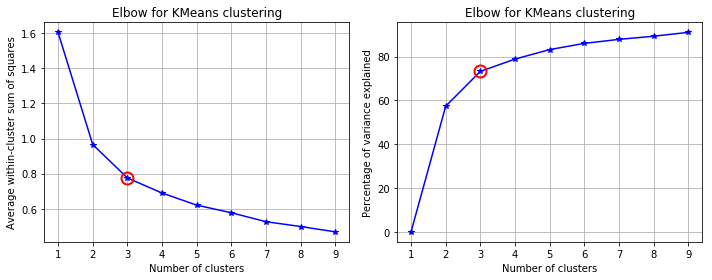

In [12]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

kIdx = 10-1
##### plot ###
kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

## Average silhouette method

In [ ]:
from sklearn.metrics import silhouette_score
from matplotlib import cm

score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    score.append(silhouette_score(X, labels, metric='euclidean'))

    # Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

# Initialize the clusterer with n_clusters value and a random generator
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
model.fit_predict(X)
cluster_labels = np.unique(model.labels_) 
n_clusters = cluster_labels.shape[0]

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, model.labels_)

plt.subplot(1, 2, 2)

y_lower, y_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster_labels ==c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = cm.spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)


plt.yticks(yticks, cluster_labels+1)

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette for K-means")
plt.show()

## Hierarchical Clustering
Agglomerative clustering is a hierarchical cluster technique that builds nested clusters with a bottom-up approach where each data point starts in its own cluster and as we move up, the clusters are merged, based on a distance matrix.

### Key Parameters
**n_clusters:** number of clusters to find, default is 2.<br>
**linkage:** It has to be one of the following, that is, ward or complete or average, default=ward.<br>
Let’s understand each linkage a bit more. The Ward’s method will merge clusters if the in-cluster variance or the sum of square error is a minimum. All pairwise distances of both clusters are used in ‘average’ method, and it is less affected by outliers. The ‘complete’ method considers the distance between the farthest elements of two clusters,so it is also known as maximum linkage.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Agglomerative.JPG?raw=true "Agglomerative clustering linkage"

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Cluster
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

print (model.labels_)
iris['pred_species'] =  model.labels_

print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print ("Classification report :", metrics.classification_report(iris.species, iris.pred_species))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy : 0.773333333333
Classification report :              precision    recall  f1-score   support

        0.0       1.00      0.98      0.99        50
        1.0       0.64      0.74      0.69        50
        2.0       0.70      0.60      0.65        50

avg / total       0.78      0.77      0.77       150



In [ ]:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap
colormap = np.array(['red', 'blue', 'green'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.pred_species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.pred_species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

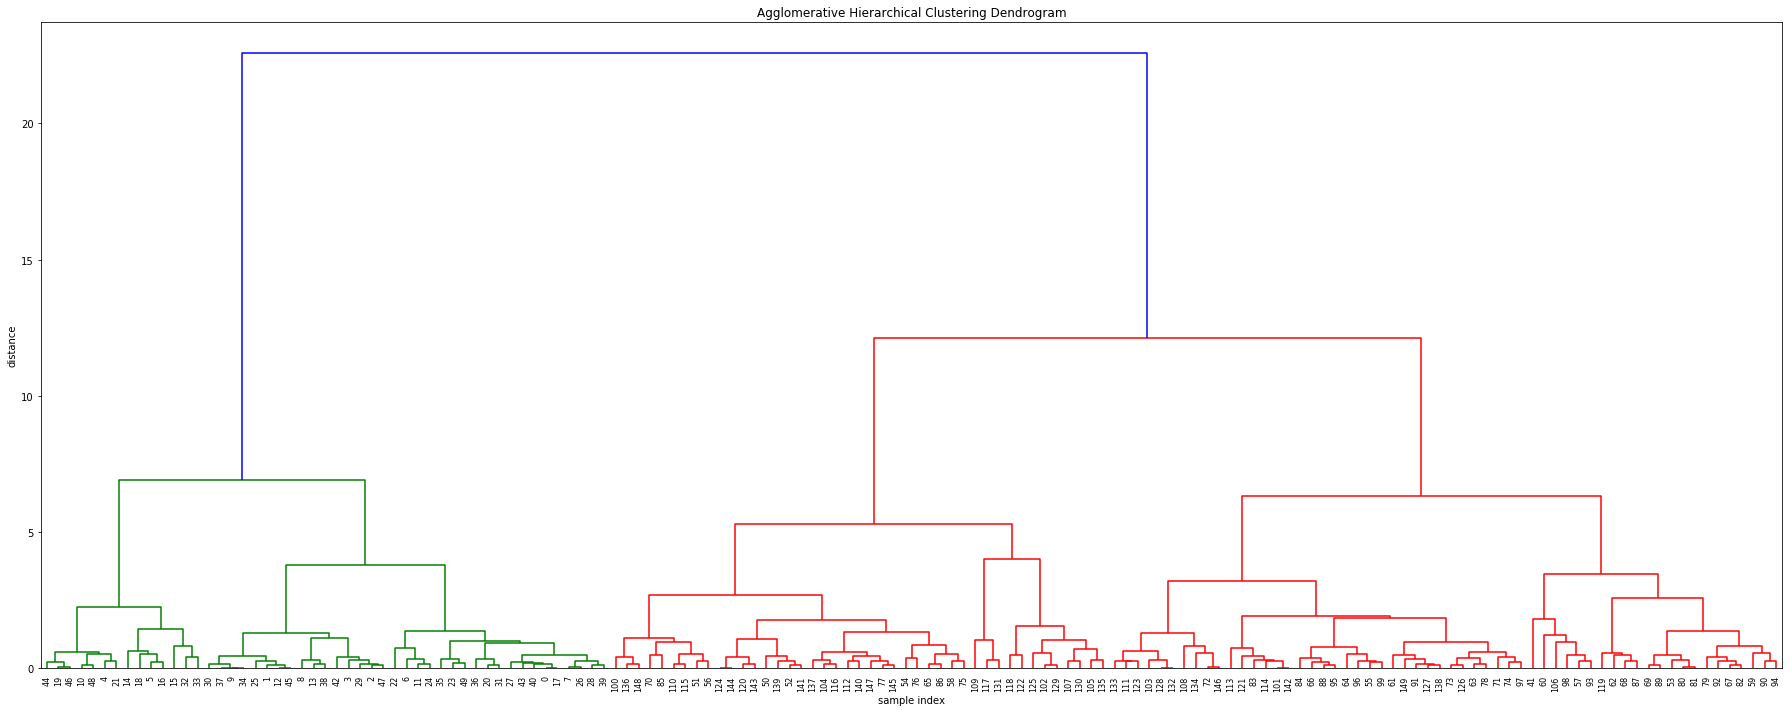

In [17]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.tight_layout()

Since we know that k=3, we can cut the tree at a distance threshold of around 10 to get exactly 3 distinct clusters.

# Principal Component Analysis (PCA)
Existence of a large number of features or dimensions makes analysis computationally intensive and hard for performing machine learning tasks for pattern identification. PCA is the most popular unsupervised linear transformation technique for dimensionality reduction. PCA finds the directions of maximum variance in high-dimensional data such that most of the information is retained and projects it onto a smaller dimensional subspace.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/PCA.png?raw=true "Principal Component Analysis (PCA)"
The PCA approach can be summarized as below. 
- Standardize data.
- Use standardized data to generate covariance matrix or correlation matrix.
- Perform eigen decomposition, that is, compute eigen vectors that are the principal component which will give the direction and compute eigen values which will give the magnitude.
- Sort the eigen pairs and select eigen vectors with the largest eigen values that cumulatively capture information above a certain threshold (say 95%).

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data


### Standardize data

In [19]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

### Eigens Decomposition

In [20]:
# eigendecomposition on covariance matrix

# create covariance matrix
cov_mat = np.cov(X_std.T)

print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [21]:
# sort eigenvalues in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


### Plot principal components vs explained variance

Cummulative Variance Explained [  72.77045209   95.80097536   99.48480732  100.        ]


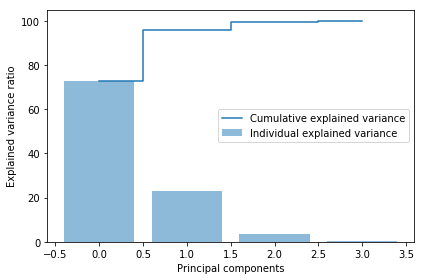

In [23]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Cummulative Variance Explained", cum_var_exp)

plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### You perform the PCA using sklearn library and plot eigenvalues
In the above plot we can see that first 3 principal components are explaining 99% of the variance. Let's perform PCA using scikit-learn and plot the 1st 3 eigenvector

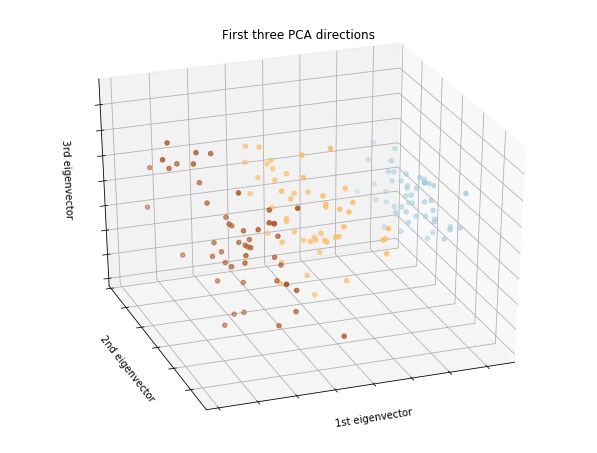

In [24]:
# source: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
Y = iris.target

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
